> **Task:** Classify the types of male and female voices with **k-NN**

# Preparation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Load Data

In [2]:
df = pd.read_csv('../../datasets/voice.csv')

display(df.head(10))
display(df.describe())
display(df.info())

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

None

# Exploratory Data Analysis (EDA) & Data Preprocessing

## Data Encoding

In [3]:
# convert label (gender) from categorical to numeric
df_encoded = df.copy()
df_encoded["label"] = LabelEncoder().fit_transform(df["label"])  # female=0, male=1

## Correlation Analysis

In [4]:
corr = df_encoded.corr()["label"].abs().sort_values(ascending=False)
display(corr)

label       1.000000
meanfun     0.833921
IQR         0.618916
Q25         0.511455
sp.ent      0.490552
sd          0.479539
sfm         0.357499
meanfreq    0.337415
centroid    0.337415
median      0.283919
maxdom      0.195657
mindom      0.194974
dfrange     0.192213
meandom     0.191067
mode        0.171775
maxfun      0.166461
minfun      0.136692
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
Name: label, dtype: float64

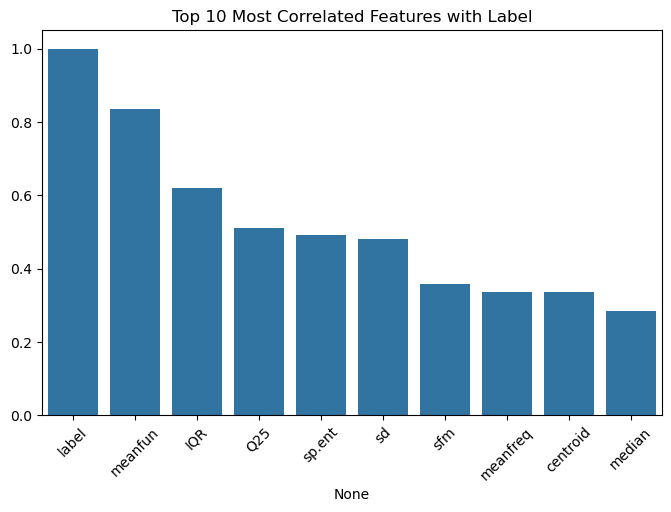

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(x=corr.index[:10], y=corr.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Most Correlated Features with Label")
plt.show()

# Prepare Dataset

In [6]:
y = df['label']

top_n_features = 10
selected_features = corr.index[1:top_n_features]  # skip 'label' itself

X_selected = df[selected_features]
X_all = df_encoded.drop(columns='label')

# Split Dataset

In [7]:
# Split the dataset into training and testing sets
splits = {
    "All Features": train_test_split(X_all, y, test_size=0.2, random_state=30),
    "Selected Features": train_test_split(X_selected, y, test_size=0.2, random_state=30)
}

for key, (X_train, X_test, y_train, y_test) in splits.items():
    print(f'\n{key}')
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")


All Features
Training set size: 2534 samples
Testing set size: 634 samples

Selected Features
Training set size: 2534 samples
Testing set size: 634 samples


## Model Training

In [8]:
results = {}
models = {}

for name, (X_train, X_test, y_train, y_test) in splits.items():
    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train model
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    models[name] = (model, scaler)

    # Predict & evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = acc

    # Print detailed report
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

print("\nSummary of accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


=== All Features ===
Accuracy: 0.9653
              precision    recall  f1-score   support

      female       0.98      0.95      0.97       321
        male       0.95      0.98      0.97       313

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634


=== Selected Features ===
Accuracy: 0.9826
              precision    recall  f1-score   support

      female       0.98      0.99      0.98       321
        male       0.99      0.98      0.98       313

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634


Summary of accuracies:
All Features: 0.9653
Selected Features: 0.9826


# Visualize the Results

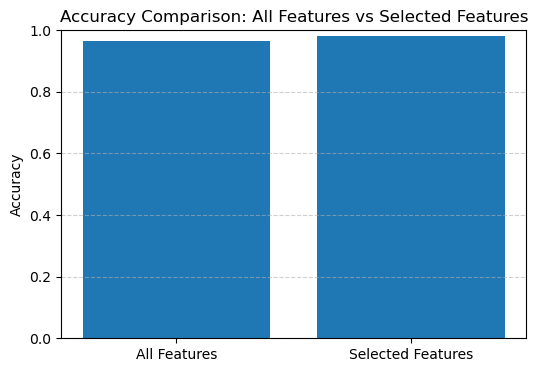

In [ ]:
# === Visualization ===
plt.figure(figsize=(6, 4))
plt.bar(results.keys(), results.values()) # type: ignore
plt.title("Accuracy Comparison: All Features vs Selected Features")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Conclusion

Berdasarkan percobaan yang telah dilakukan, saya melakukan 2 percobaan dengan 2 cara: mengambil seluruh fitur dan sebagian saja. Fitur sebagian ini diambil dari proses penentuan seberapa berkorelasi fitur tersebut [Correlation analysis](#correlation-analysis) dengan data label yang ada. Di sini saya hanya mengambil 10 fitur yang paling berkorelasi. Jika menggunakan seluruh fitur, maka hasil akurasinya adalah $0.9653$ sedangkan untuk beberapa fitur saja justru mendapatkan hasil sedikit peningkatan $0.9826$.

Hasil tersebut bisa lebih bagus bisa jadi karena beberapa fitur yang kurang berkorelasi tidak diikutseta dalam proses training sehingga tidak mengganggu proses utama.